In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mall = pd.read_csv("mall.csv")
mall.head(10)

,income,spend
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
5,192,148
6,294,153
7,263,173
8,199,162
9,168,174


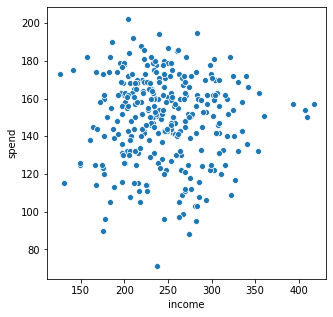

In [3]:
plt.figure(figsize = (5,5))
sns.scatterplot(mall["income"],mall["spend"])
plt.show()

# K-Means

In [4]:
from sklearn.cluster import KMeans

In [5]:
ke1 = KMeans(n_clusters = 3, init = "k-means++", n_init = 10, max_iter = 300, random_state = 1)

ke1.fit(mall)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [6]:
ke1.inertia_

297101.3764201943

In [7]:
centroids = ke1.cluster_centers_

In [8]:
centroids

array([[317.55      , 148.73333333],
       [196.68224299, 150.57943925],
       [251.61764706, 149.31617647]])

In [9]:
centroid_mall = pd.DataFrame(centroids, columns = ["X","Y"])

In [10]:
centroid_mall

,X,Y
0,317.550000,148.733333
1,196.682243,150.579439
2,251.617647,149.316176


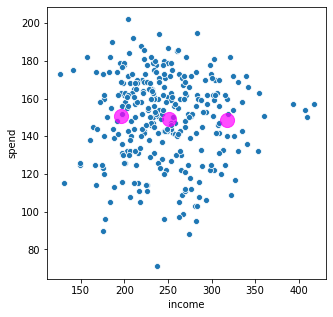

In [11]:
plt.figure(figsize = (5,5))
sns.scatterplot(mall["income"],mall["spend"])
plt.scatter(centroid_mall["X"],centroid_mall["Y"], c = 'magenta', s = 200, alpha = 0.7)
plt.show()

# c-for colour, s- for size of centroids , alpha-for transparancy of centroids

## K-values & Elbow Method

In [12]:
# WCSS -  Within-Cluster-Sum-of-Squares (WCSS). 
# WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.

In [13]:
wcss = []

for k in range(1,30):
    ke2 = KMeans(n_clusters = k, init = "k-means++", n_init = 10, max_iter = 300, random_state = 1)
    ke2.fit(mall)
    wcss.append(ke2.inertia_)

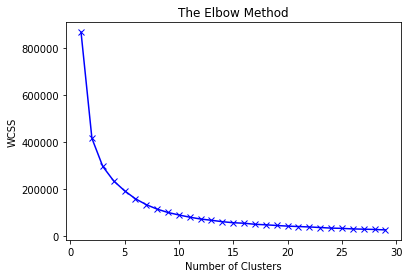

In [14]:
plt.plot(range(1,30),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
ke3 = KMeans(n_clusters = 5, init = "k-means++", n_init = 10, max_iter = 300, random_state = 1)

In [16]:
labels = ke3.fit_predict(mall)

In [17]:
ke3.inertia_

193593.3586522168

In [18]:
centroids = ke3.cluster_centers_
centroids

array([[248.97196262, 158.82242991],
       [271.64705882, 114.94117647],
       [194.68085106, 125.70212766],
       [321.34615385, 153.23076923],
       [199.71428571, 167.6984127 ]])

In [19]:
centroid_mall = pd.DataFrame(centroids,columns = ["X","Y"])
centroid_mall

,X,Y
0,248.971963,158.822430
1,271.647059,114.941176
2,194.680851,125.702128
3,321.346154,153.230769
4,199.714286,167.698413


In [20]:
labels

array([0, 0, 4, 0, 3, 4, 3, 0, 4, 4, 0, 1, 0, 2, 0, 4, 3, 2, 0, 0, 0, 0,
       4, 0, 4, 3, 4, 2, 3, 4, 4, 2, 4, 0, 2, 4, 3, 0, 0, 3, 3, 0, 4, 0,
       3, 3, 0, 0, 2, 0, 0, 3, 0, 4, 0, 4, 4, 0, 4, 3, 1, 3, 4, 2, 4, 4,
       0, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 4, 4, 0, 0, 3, 3, 3, 1, 0, 0, 4,
       4, 1, 0, 4, 4, 3, 2, 2, 3, 0, 3, 0, 0, 0, 4, 0, 4, 2, 0, 0, 0, 0,
       3, 4, 3, 4, 0, 4, 4, 4, 4, 0, 1, 0, 0, 0, 4, 4, 2, 0, 4, 1, 4, 0,
       3, 0, 3, 0, 2, 2, 2, 1, 3, 3, 4, 0, 2, 0, 0, 0, 0, 4, 0, 2, 0, 0,
       4, 2, 0, 4, 4, 4, 0, 3, 4, 4, 4, 1, 2, 0, 0, 4, 0, 0, 0, 4, 2, 2,
       0, 3, 2, 1, 3, 2, 3, 0, 0, 3, 0, 1, 0, 4, 3, 2, 2, 1, 4, 3, 0, 0,
       1, 0, 4, 0, 1, 0, 2, 0, 0, 0, 2, 4, 0, 0, 2, 3, 0, 3, 1, 3, 1, 0,
       3, 2, 0, 1, 0, 2, 1, 2, 3, 3, 0, 1, 3, 1, 3, 3, 3, 3, 3, 0, 1, 0,
       2, 1, 2, 0, 3, 1, 0, 0, 1, 0, 1, 1, 1, 3, 1, 2, 0, 0, 0, 0, 1, 0,
       2, 2, 3, 2, 1, 1, 0, 0, 1, 0, 1, 4, 2, 0, 3, 2, 3, 4, 2, 4, 2, 3,
       4, 0, 3, 2, 4, 3, 0, 4, 2, 2, 2, 2, 1, 1, 2,

In [21]:
mall_new = pd.concat([mall, pd.DataFrame({'labels':labels})], axis = 1)
mall_new.head()

,income,spend,labels
0,233,150,0
1,250,187,0
2,204,172,4
3,236,178,0
4,354,163,3


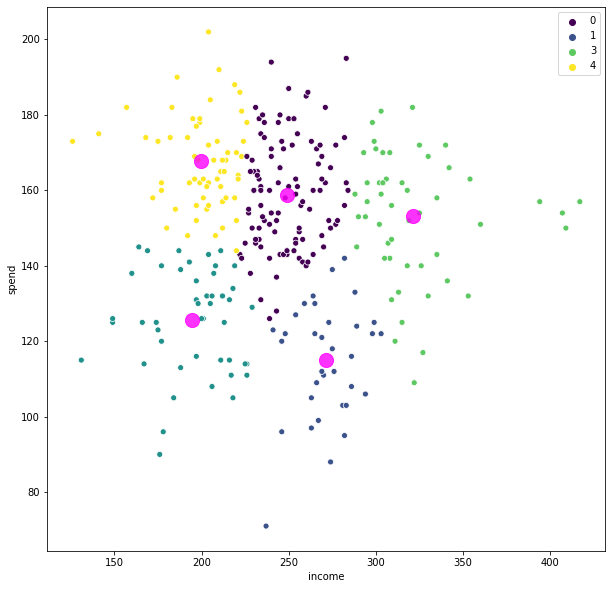

In [22]:
plt.figure(figsize =(10,10))
sns.scatterplot(x = mall["income"], y = mall["spend"], hue = labels, palette = 'viridis')
plt.scatter(centroid_mall["X"], centroid_mall["Y"],c = 'magenta', s = 200, alpha = 0.8)
plt.show()